### Analisis Data Time Series

Taufik Satria Nugraha - Universitas Jenderal Soedirman


In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [147]:
data_dict = pd.read_excel("TMA Depok 2023.xlsx", sheet_name=None)

data_jan = data_dict['Jan']
data_feb = data_dict['Feb']
data_mar = data_dict['Mar']

data_full = pd.concat(data_dict.values(), ignore_index=True)

In [29]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11487 entries, 0 to 11486
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     11487 non-null  datetime64[ns]
 1   Jam         11487 non-null  object        
 2   Tinggi Air  11487 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 269.4+ KB


In [30]:
data_full.describe()

,Tinggi Air
count,11487.000000
mean,1035.144076
std,373.602141
min,-300.000000
25%,900.000000
50%,960.000000
75%,1110.000000
max,16180.000000


In [32]:
data_full

,Tanggal,Jam,Tinggi Air
0,2023-01-01,00:00,1350
1,2023-01-01,00:10,0
2,2023-01-01,00:20,1350
3,2023-01-01,00:30,1350
4,2023-01-01,00:40,1340
...,...,...,...
11482,2023-03-27,20:20,900
11483,2023-03-27,20:30,900
11484,2023-03-27,21:22,1050
11485,2023-03-27,22:10,1000


Cek Duplikat

In [148]:
duplikat_tanggal_jam = data_full[data_full.duplicated(subset=['Tanggal', 'Jam'], keep=False)]
print("Nilai yang memiliki duplikat jika kolom 'Tanggal' dan 'Jam' bersamaan duplicated:")
print(duplikat_tanggal_jam)

Nilai yang memiliki duplikat jika kolom 'Tanggal' dan 'Jam' bersamaan duplicated:
         Tanggal    Jam  Tinggi Air
77    2023-01-01  13:20        1600
78    2023-01-01  13:20        1600
155   2023-01-02  02:10        1250
156   2023-01-02  02:10        1250
161   2023-01-02  03:00        1240
...          ...    ...         ...
11088 2023-03-23  15:00         910
11096 2023-03-23  16:20         910
11097 2023-03-23  16:20         910
11285 2023-03-25  15:40         900
11286 2023-03-25  15:40         900

[140 rows x 3 columns]


Hapus Duplikat

In [149]:
data_full = data_full.drop_duplicates(subset=['Tanggal', 'Jam'])

Cek Outlier

In [140]:
z_scores = zscore(data_clean['Tinggi Air'])
threshold = 1
outliers = data_full[abs(z_scores) > threshold]

print("Nilai-nilai Outlier:")
print(outliers['Tinggi Air'])

Nilai-nilai Outlier:
1           0
57       1410
58       1420
59       1430
60       1450
         ... 
11393    1500
11394    1650
11395    1550
11396    1450
11405    -300
Name: Tinggi Air, Length: 637, dtype: int64


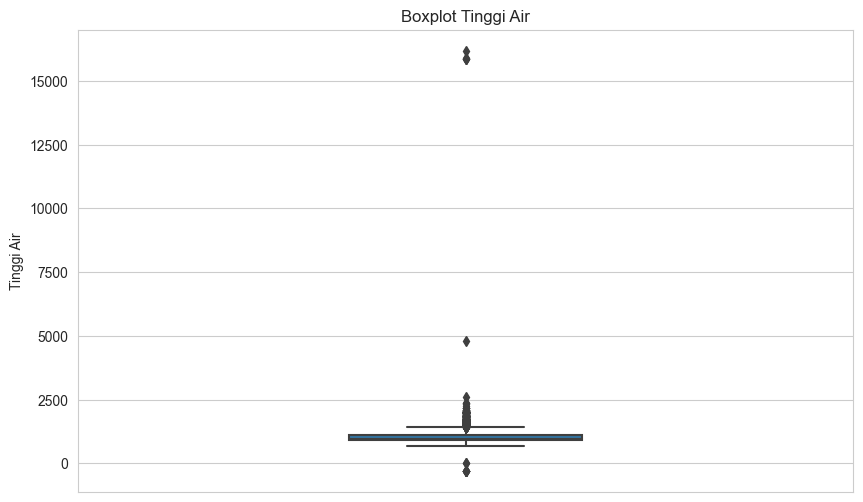

In [141]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(y=data_full['Tinggi Air'], width=0.3)
plt.title('Boxplot Tinggi Air')
plt.ylabel('Tinggi Air')
plt.show()

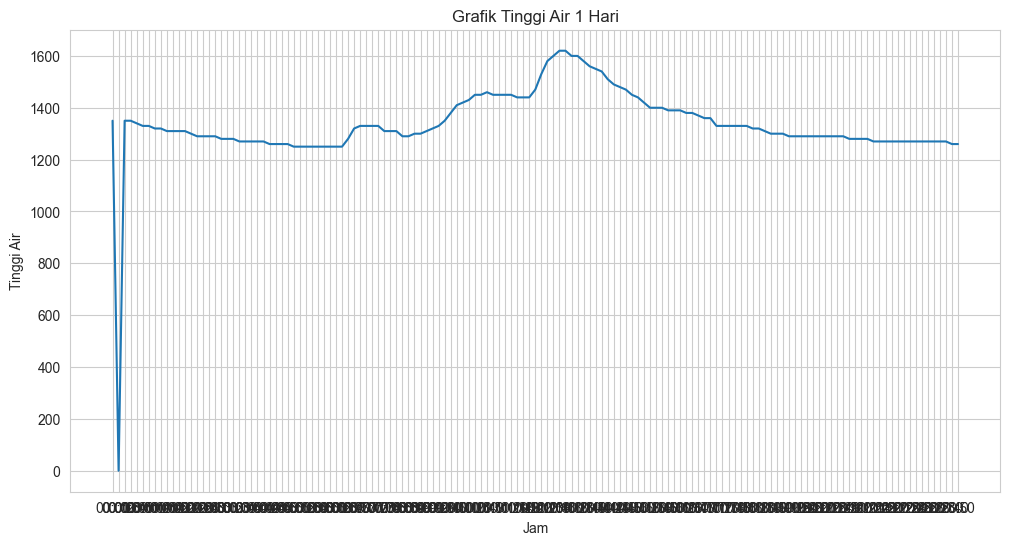

In [142]:
data_fil = data_full[data_full['Tanggal'] == '2023-01-01']

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
plt.plot(data_fil["Jam"], data_fil['Tinggi Air'])
plt.title('Grafik Tinggi Air 1 Hari')
plt.xlabel('Jam')
plt.ylabel('Tinggi Air')
plt.show()

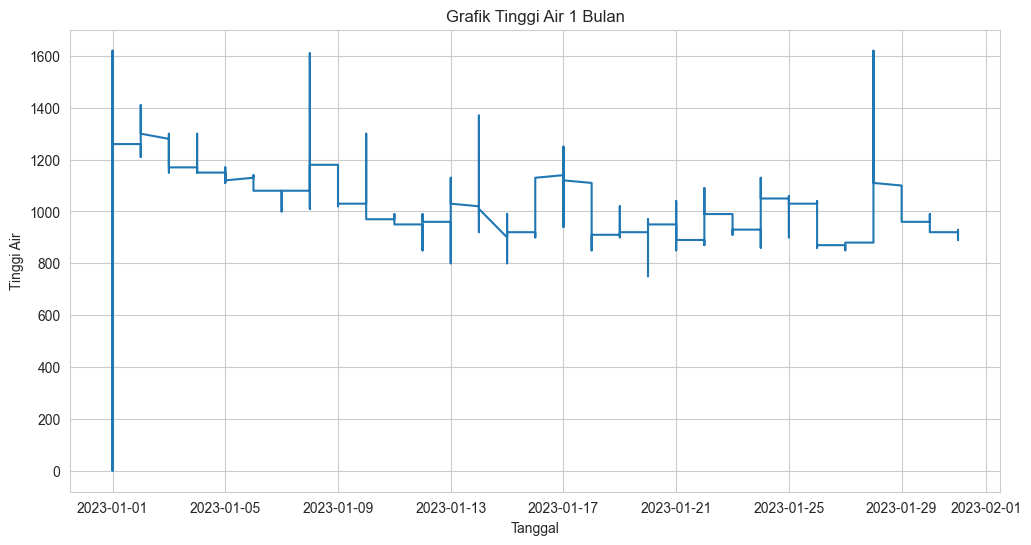

In [138]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
plt.plot(data_jan["Tanggal"], data_jan['Tinggi Air'])
plt.title('Grafik Tinggi Air 1 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Air')
plt.show()

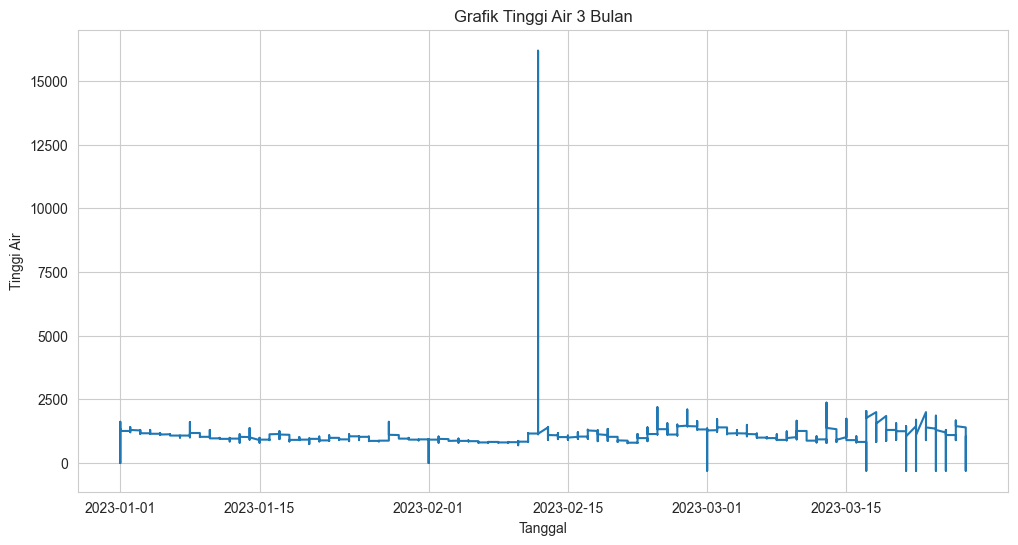

In [219]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
plt.plot(data_full["Tanggal"], data_full['Tinggi Air'])
plt.title('Grafik Tinggi Air 3 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Air')
plt.show()

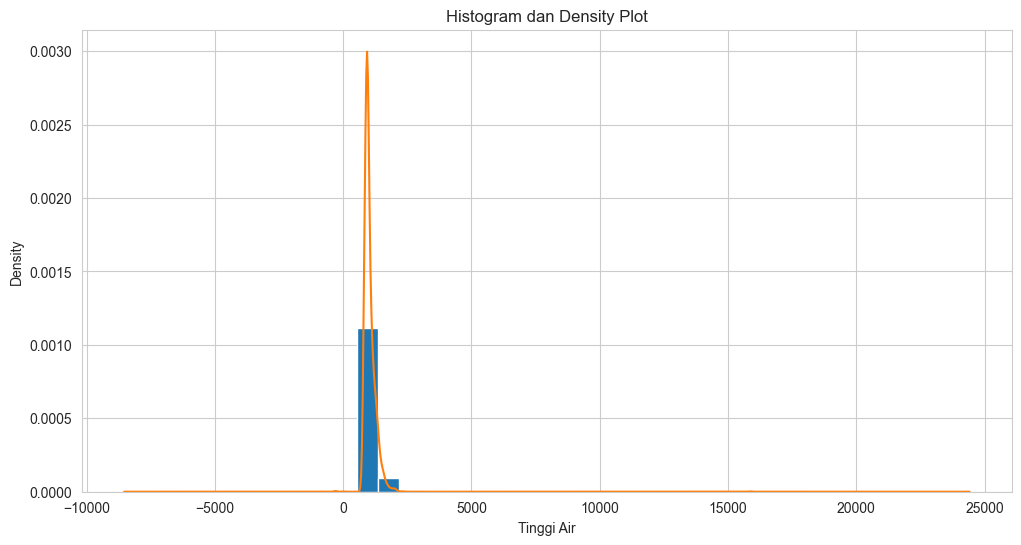

In [206]:
plt.figure(figsize=(12, 6))
data_full['Tinggi Air'].plot(kind='hist', bins=20, density=True)
data_full['Tinggi Air'].plot(kind='kde')
plt.title('Histogram dan Density Plot')
plt.xlabel('Tinggi Air')
plt.show()

Menghapus outlier 

In [180]:
z_scores = zscore(data_full['Tinggi Air'])
threshold = 2
data_clean = data_full[abs(z_scores) <= threshold]

In [179]:
z_scores = zscore(data_full['Tinggi Air'])
threshold = 2
outliers = data_full[abs(z_scores) > threshold]

print("Nilai-nilai Outlier:")
print(outliers['Tinggi Air'])

Nilai-nilai Outlier:
1           0
4429        0
6008     1880
6009     1960
6010     1980
         ... 
11209    1860
11210    1840
11211    1790
11231    -300
11405    -300
Name: Tinggi Air, Length: 106, dtype: int64


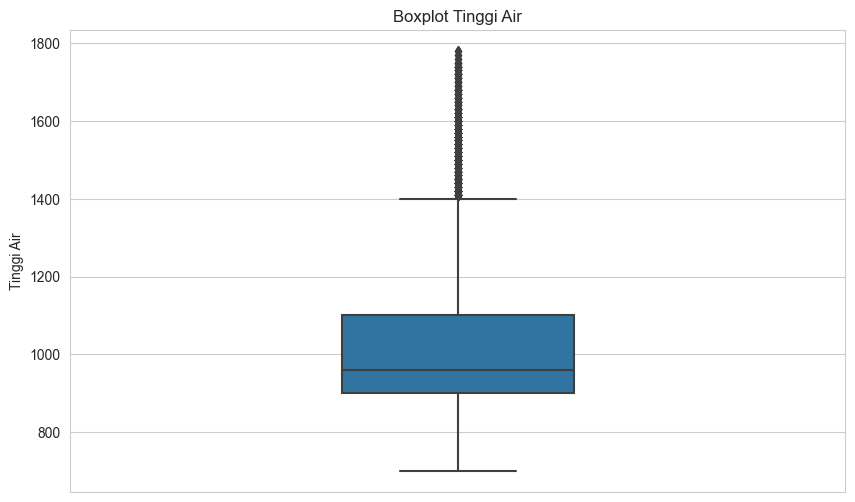

In [181]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(y=data_clean['Tinggi Air'], width=0.3)
plt.title('Boxplot Tinggi Air')
plt.ylabel('Tinggi Air')
plt.show()

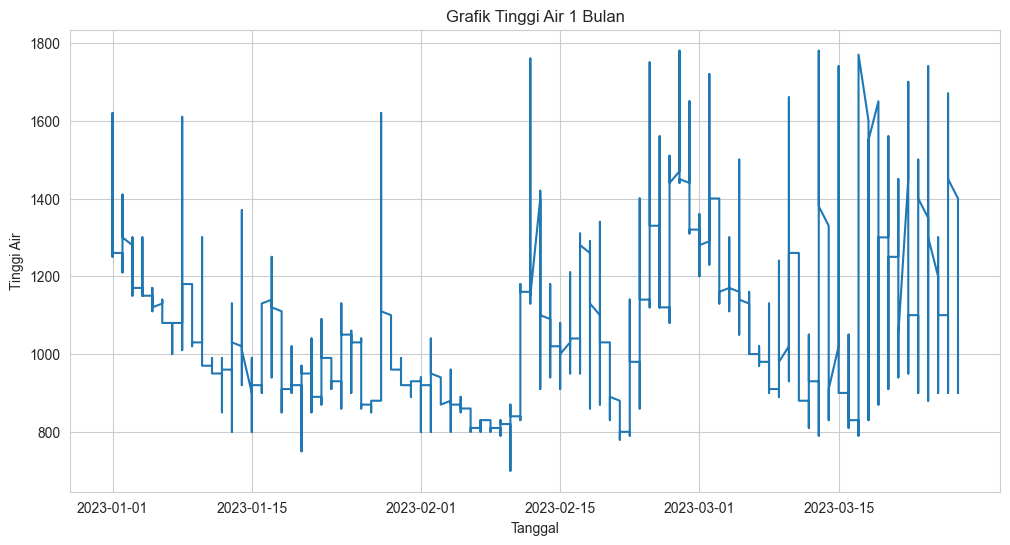

In [182]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
plt.plot(data_clean["Tanggal"], data_clean['Tinggi Air'])
plt.title('Grafik Tinggi Air 1 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Air')
plt.show()

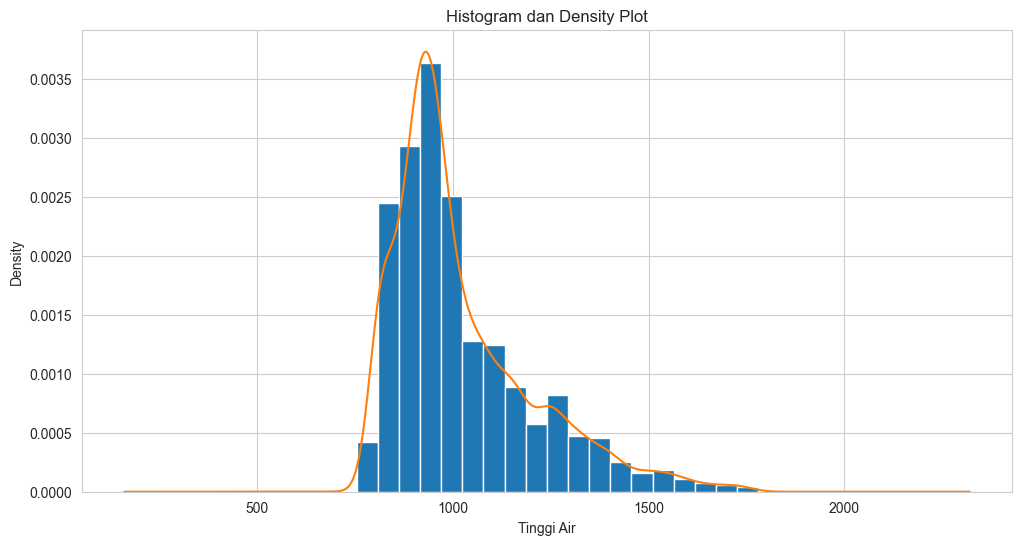

In [198]:
plt.figure(figsize=(12, 6))
data_full['Tinggi Air'].plot(kind='hist', bins=20, density=True)
data_full['Tinggi Air'].plot(kind='kde')
plt.title('Histogram dan Density Plot')
plt.xlabel('Tinggi Air')
plt.show()

Klasifikasi Tinggi Air Berdasarkan Mean
1. Jika Tinggi Air < Mean maka NORMAL
2. Jika Tinggi Air > Mean maka TINGGI

In [ ]:
mean_fil = data_clean['Tinggi Air'].mean()
data_clean['Klasifikasi'] = data_clean['Tinggi Air'].apply(lambda x: 'Normal' if x < mean_fil else 'Tinggi')

In [185]:
data_clean

,Tanggal,Jam,Tinggi Air,Klasifikasi
0,2023-01-01,00:00,1350,Tinggi
2,2023-01-01,00:20,1350,Tinggi
3,2023-01-01,00:30,1350,Tinggi
4,2023-01-01,00:40,1340,Tinggi
5,2023-01-01,00:50,1330,Tinggi
...,...,...,...,...
11482,2023-03-27,20:20,900,Normal
11483,2023-03-27,20:30,900,Normal
11484,2023-03-27,21:22,1050,Tinggi
11485,2023-03-27,22:10,1000,Normal


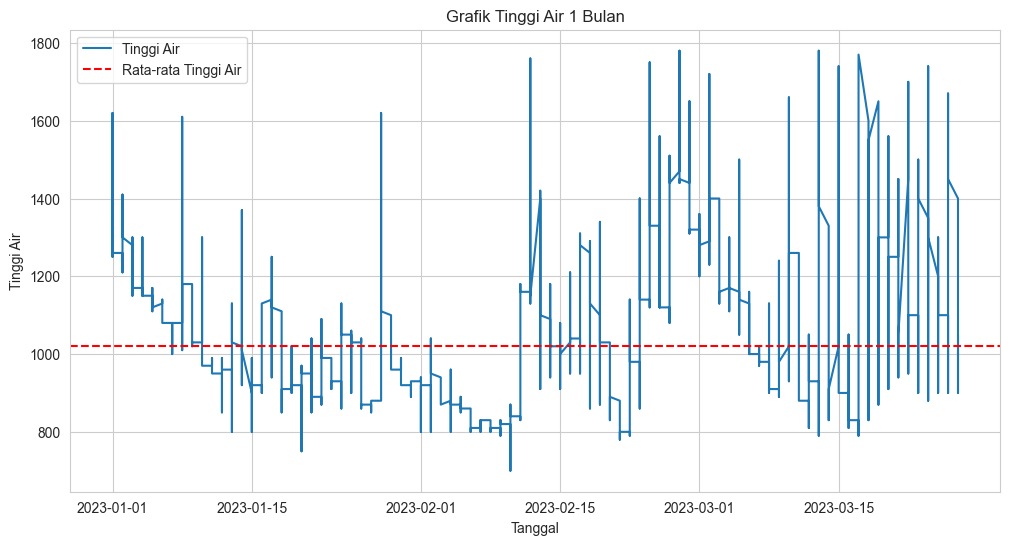

In [186]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
plt.plot(data_clean["Tanggal"], data_clean['Tinggi Air'], label='Tinggi Air')
plt.axhline(mean_fil, color='r', linestyle='--', label='Rata-rata Tinggi Air')
plt.title('Grafik Tinggi Air 1 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Air')
plt.legend()
plt.show()